In [2]:
cluster = 'a2744'
zclus = {'a2744' : 0.308,
         'm0416' : 0.396}
pgals = {'a2744' : [1.689791e-01, 1.965115e+00, 2.0],
        'm0416' : [3.737113e-01, 1.322081e+00, 2.0]}

nclus = {'a2744': "Abell 2744",
         'm0416' : "MACS 0416"}

import sys
utils = 'C:\\Users\\Jackson Lee\\Jupyter projects\\Master\\Utility\\'
sys.path.insert(0, utils)

root = 'C:\\Users\\Jackson Lee\\Jupyter projects\\'
sys.path.insert(0, root)

filebase = 'C:\\Users\\Jackson Lee\\Jupyter projects\\Master\\' + nclus[cluster] + "\\Files"

import numpy as np
from astropy.cosmology import FlatLambdaCDM
from os import listdir
from os.path import isfile, join
# import multiprocess
# from multiprocess import Pool
import defUtil as Def
import fitClusParallel as myFit
import pickle
import matplotlib.pyplot as plt

zlens = zclus[cluster]
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

Read image data from file C:\Users\Jackson Lee\Jupyter projects\Files/a2744_images.dat


In [3]:
galPath = filebase + "\\Galaxy Probability Files\\"
galFiles = [f for f in listdir(galPath) if isfile(join(galPath, f))]

defPath = filebase + "\\Deflections"
frames_list = [[join(galPath, f), join(defPath, f)] for f in galFiles]
print(len(galFiles))

28


In [5]:
#Use multiprocessing to generate deflection arrays
max_pool = multiprocess.cpu_count()
print(max_pool)
with Pool(max_pool) as p:
    pool_outputs = list(p.imap(Def.process_frame,
               frames_list))    


8


In [7]:
#Test deflections against past defections
fname = join(defPath, "CM + box")
f = open(fname + '.pkl', 'rb')
aarr1,marr1,Cmat1,Garr1 = pickle.load(f)

fname = 'C:\\Users\\Jackson Lee\\Jupyter projects\\Files\\Deflections\\a2744-box-defs'
f = open(fname +'.pkl','rb')
aarr2,marr2,Cmat2,Garr2 = pickle.load(f)

fname = 'C:\\Users\\Jackson Lee\\Jupyter projects\\Files\\a2744-def1-scale1'
f = open(fname +'.pkl','rb')
aarr3,marr3,Cmat3,Garr3 = pickle.load(f)


print(marr1.shape)

(31, 71, 2)


In [4]:
def plotDiff(marr1, marr2):
    x1 = marr1[0:31,:,:].flatten()
    x2 = marr2[0:31,:,:].flatten()
    plt.plot(x1 - x2)

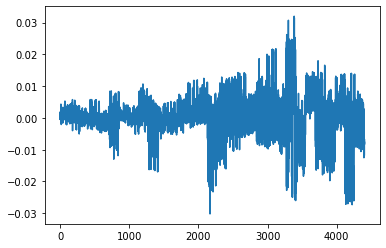

In [11]:
#plotDiff(marr1, marr3)
plotDiff(marr1, marr2)

In [25]:
fname = 'C:\\Users\\Jackson Lee\\Jupyter projects\\Files\\Deflections\\a2744-box-defs'
f = open(fname +'.pkl','rb')
aarr3,marr3,Cmat3,Garr3 = pickle.load(f)

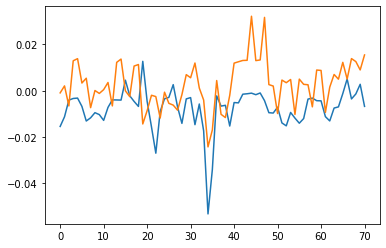

In [32]:
plt.plot(marr1[0,:,:] - marr3[0,:,:])

In [12]:
#Part 2 of analysis: Generate deflections for different runs of same classifier
def duplicate(classifier, n, frames_list):
    for i in range(1, n + 1):
        f = classifier + " - {}".format(i);
        frames_list.append([join(galPath, classifier), join(defPath, f)])

In [13]:
frames_list = []
duplicate("CM + sigmaDet", 4, frames_list)
duplicate("Coe + rf", 4, frames_list)

print(frames_list)

[['C:\\Users\\Jackson Lee\\Jupyter projects\\Master\\Abell 2744\\Files\\Galaxy Probability Files\\CM + sigmaDet', 'C:\\Users\\Jackson Lee\\Jupyter projects\\Master\\Abell 2744\\Files\\Deflections\\CM + sigmaDet - 1'], ['C:\\Users\\Jackson Lee\\Jupyter projects\\Master\\Abell 2744\\Files\\Galaxy Probability Files\\CM + sigmaDet', 'C:\\Users\\Jackson Lee\\Jupyter projects\\Master\\Abell 2744\\Files\\Deflections\\CM + sigmaDet - 2'], ['C:\\Users\\Jackson Lee\\Jupyter projects\\Master\\Abell 2744\\Files\\Galaxy Probability Files\\CM + sigmaDet', 'C:\\Users\\Jackson Lee\\Jupyter projects\\Master\\Abell 2744\\Files\\Deflections\\CM + sigmaDet - 3'], ['C:\\Users\\Jackson Lee\\Jupyter projects\\Master\\Abell 2744\\Files\\Galaxy Probability Files\\CM + sigmaDet', 'C:\\Users\\Jackson Lee\\Jupyter projects\\Master\\Abell 2744\\Files\\Deflections\\CM + sigmaDet - 4'], ['C:\\Users\\Jackson Lee\\Jupyter projects\\Master\\Abell 2744\\Files\\Galaxy Probability Files\\Coe + rf', 'C:\\Users\\Jackson Lee

In [14]:
#Use multiprocessing to generate deflection arrays
max_pool = multiprocess.cpu_count()
print(max_pool)
with Pool(max_pool) as p:
    pool_outputs = list(p.imap(Def.process_frame,
               frames_list))    


8


In [45]:
#Verify deflection similarities Between same deflections
fname = join(defPath, "Coe + rf - 2")
f = open(fname + '.pkl', 'rb')
aarr1,marr1,Cmat1,Garr1 = pickle.load(f)

fname = join(defPath, "Coe + rf - 3")
f = open(fname +'.pkl','rb')
aarr2,marr2,Cmat2,Garr2 = pickle.load(f)

fname = join(defPath, "CM + sigmaDet")
f = open(fname +'.pkl','rb')
aarr3,marr3,Cmat3,Garr3 = pickle.load(f)

fname = join(defPath, "CM + sigmaDet - 1")
f = open(fname +'.pkl','rb')
aarr4,marr4,Cmat4,Garr4 = pickle.load(f)



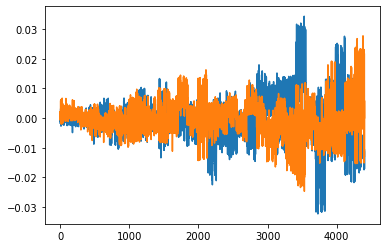

In [46]:
plotDiff(marr1, marr2)
plotDiff(marr3, marr4)
